In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from math import exp
%matplotlib inline

#importing the titanic data set
titanic_data = sns.load_dataset('titanic')
#viewing the first 10 rows of the data set
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [163]:
#finding the number of passengers
print("number of passengers in original data:" +str(len(titanic_data.index)))

number of passengers in original data:891


<AxesSubplot:xlabel='survived', ylabel='count'>

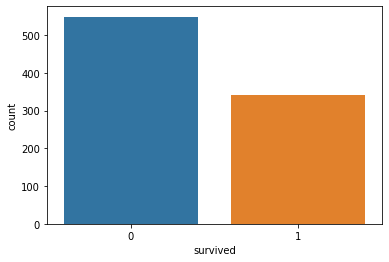

In [164]:
#this part of the dataset will be used as the binary output
sns.countplot(x="survived", data = titanic_data)

In [165]:
#Cleaning the data of unecessary NaN values and empty columns
#this will show which columns have null values, false meaning they do not have null value and true meaning they do
titanic_data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [166]:
#this will show a sum of the values which are null in the respective columns
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [167]:
#to get a clearer understanding of which columns are already in terms of binary values and which are not
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [168]:
#dropping the deck column as it is full of NaN values
titanic_data.drop("deck",axis=1,inplace=True)

In [169]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [170]:
#dropping all the null values in the columns
titanic_data.dropna(inplace=True)

In [171]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [172]:
#converting string variables to dummy variables
#since we only need one column to figure out if a person is male or female
sex = pd.get_dummies(titanic_data['sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [125]:
#Here we only need two columns to get the total information, therefore the firt column can be dropped
# embark=pd.get_dummies(titanic_data["embarked"],drop_first=True)
# embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [126]:
#Here also we only need two columns to get the total information, therefore the firt column can be dropped
# pcl=pd.get_dummies(titanic_data["pclass"],drop_first=True)
# pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [174]:
#Now all these data have been made catagorical and need to be concatenated into the rows
titanic_data=pd.concat([titanic_data,sex],axis=1)
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [151]:
#Now to delete all the unnecessary data
# titanic_data.drop(['sex','sibsp','parch','fare','class','who','adult_male','embark_town','alive','alone','embarked'],axis=1,inplace=True)

In [160]:
# x = titanic_data.drop("survived",axis=1,inplace=True)
# x.head(5)
# titanic_data.head(5)

In [194]:
x1 = titanic_data["male"]
x2 = titanic_data["age"]
y = titanic_data["survived"]

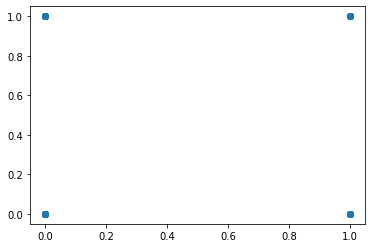

In [195]:
plt.scatter(x1,y)

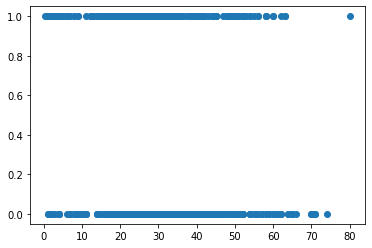

In [189]:
plt.scatter(x2,y)

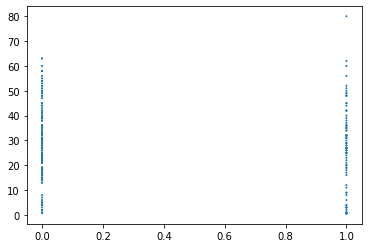

In [190]:
plt.scatter(x1,x2,y)

In [240]:
#vectorization of the coefficients
coeff = np.array([[b0],[b1],[b2]])
coeff

array([[0],
       [0],
       [0]])

In [235]:
#the x values
x = np.array([1 , x1, x2])
x

<ipython-input-235-85454eee6268>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([1 , x1, x2])


array([1, 0      1
          1      0
          2      0
          3      0
          4      1
                ..
          885    0
          886    1
          887    0
          889    1
          890    1
          Name: male, Length: 712, dtype: uint8,
       0      22.0
       1      38.0
       2      26.0
       3      35.0
       4      35.0
              ...
       885    39.0
       886    27.0
       887    19.0
       889    26.0
       890    32.0
       Name: age, Length: 712, dtype: float64], dtype=object)

In [241]:
#Creating the function z
z = coeff*x
z

array([[0, 0      0
           1      0
           2      0
           3      0
           4      0
                 ..
           885    0
           886    0
           887    0
           889    0
           890    0
           Name: male, Length: 712, dtype: uint8,
        0      0.0
        1      0.0
        2      0.0
        3      0.0
        4      0.0
              ...
        885    0.0
        886    0.0
        887    0.0
        889    0.0
        890    0.0
        Name: age, Length: 712, dtype: float64],
       [0, 0      0
           1      0
           2      0
           3      0
           4      0
                 ..
           885    0
           886    0
           887    0
           889    0
           890    0
           Name: male, Length: 712, dtype: uint8,
        0      0.0
        1      0.0
        2      0.0
        3      0.0
        4      0.0
              ...
        885    0.0
        886    0.0
        887    0.0
        889    0.0
        890   

In [257]:
#the descent function to be used is coefficient -= alpha(delta). Delta is being defined here
for i in range(40):
    delta += ((1/(1+(math.exp(-z[i])))) - y[i])*x[i]

TypeError: only size-1 arrays can be converted to Python scalars

In [238]:
#updating the coefficients for 5 iterations
for j in range(10):
    coeff = coeff - 0.3*delta
coeff

array([-3.14310065, -3.14310065, -3.14310065])

In [184]:
#for this data set, the output = b0 + b1*X1 + b2*X2 where b0, b1 and b2 are all coefficients which will be manipulated based on the data set to reach the best value. To start, we will take b0=0,b1=0 and b2=0. Alpha(learning rate) will be taken as 0.3. Since b0 does not have an initial x value input, it has simply been multiplied by 1.
# b0 = 0
# b1 = 0
# b2 = 0
# for i in range(5):     #taking 5 iterations 
#     for j in range (1):     #taking data up till 50 people
#         pred = 1/(1+(exp**(-(b0+(b1*x1[j])+(b2*x2[j])))) 
#         b0 = b0 + 0.3*(y[j]-pred)*pred*(1-pred)*1
#         b1 = b1 + 0.3*(y[j]-pred)*pred*(1-pred)*x1[j]
#         b2 = b2 + 0.3*(y[j]-pred)*pred*(1-pred)*x2[j]
    

SyntaxError: invalid syntax (<ipython-input-184-4b68f48312aa>, line 8)

In [226]:
# print(b0,b1,b2)

In [261]:
#using the final coefficients obtained, the final probabilities for each of the inputs can be determined
for k in range(50):
    prob = (1/(1+(math.exp((-(b0+(b1*x1[k])+(b2*X2[k]))))))
    prob

SyntaxError: invalid syntax (<ipython-input-261-f10b770873de>, line 4)

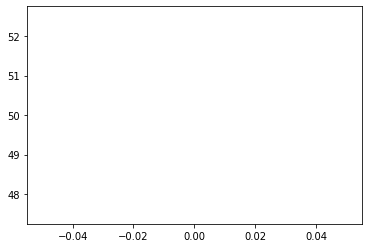

In [254]:
plt.plot(prob)